In [2]:
# Installing the fairlearn package
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 6.2 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient


In [4]:
!pip install xlrd

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#reading file
file_path = '/content/default of credit card clients (2).xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

print(df)


X=df.drop(columns=['Y'])
X=X.drop(columns=['Unnamed: 0'])

X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


#minmax scaler or standard scaler

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [8]:
pipeline = Pipeline(
    steps=[
        ("classifier",RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)),
    ]
)

testing gradient exopnent on X2

In [7]:
#FIRST TEST ON X2 GENDER
sensitive_train = X_train['X2']
sensitive_test = X_test['X2']
exponentiated_gradient = ExponentiatedGradient(
    estimator=pipeline,
    constraints=DemographicParity(),
    sample_weight_name="classifier__sample_weight"
)
exponentiated_gradient.fit(X_train, y_train, sensitive_features=sensitive_train)
y_pred = exponentiated_gradient.predict(X_test)

In [8]:
# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6462493445353135


array([[<Axes: title={'center': 'accuracy'}, xlabel='X2'>,
        <Axes: title={'center': 'precision'}, xlabel='X2'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X2'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X2'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X2'>,
        <Axes: xlabel='X2'>],
       [<Axes: xlabel='X2'>, <Axes: xlabel='X2'>, <Axes: xlabel='X2'>]],
      dtype=object)

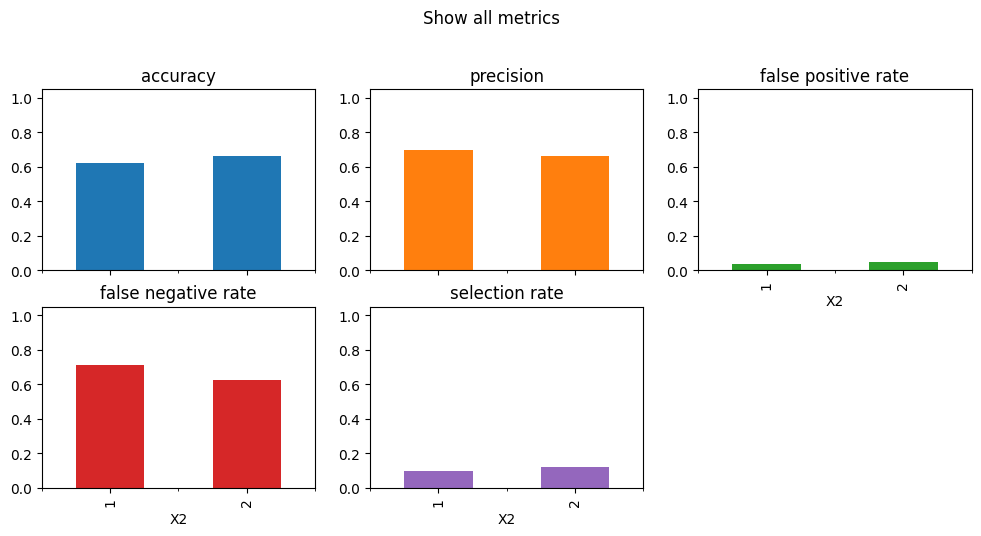

In [9]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [10]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.023493020370609366
Statistical Parity ratio: 0.8027244971682943
Equalized Odds Difference: 0.09144374881426676
Equalized Odds Ratio: 0.7481265799927771


testing gradient exopnent on X3

In [9]:
#SECOND TEST ON X3 EDUCATION
sensitive_train = X_train['X3']
sensitive_test = X_test['X3']
exponentiated_gradient = ExponentiatedGradient(
    estimator=pipeline,
    constraints=DemographicParity(),
    sample_weight_name="classifier__sample_weight"
)
exponentiated_gradient.fit(X_train, y_train, sensitive_features=sensitive_train)
y_pred = exponentiated_gradient.predict(X_test)

In [10]:
# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6450868556976108


array([[<Axes: title={'center': 'accuracy'}, xlabel='X3'>,
        <Axes: title={'center': 'precision'}, xlabel='X3'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X3'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X3'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X3'>,
        <Axes: xlabel='X3'>],
       [<Axes: xlabel='X3'>, <Axes: xlabel='X3'>, <Axes: xlabel='X3'>]],
      dtype=object)

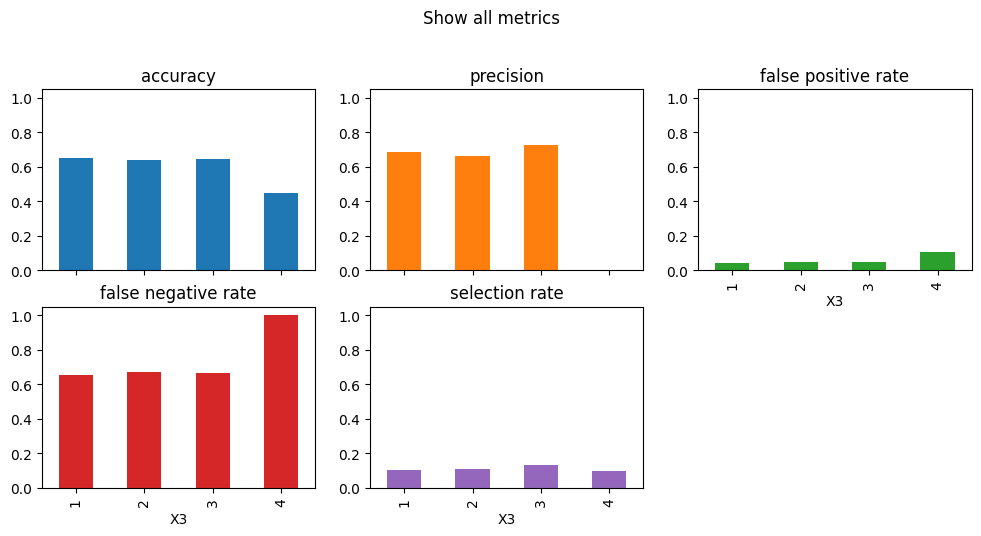

In [11]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [12]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.03208833363572744
Statistical Parity ratio: 0.75249900039984
Equalized Odds Difference: 0.34872979214780603
Equalized Odds Ratio: 0.0


testing gradient exopnenton X4

In [13]:
#THIRD TEST ON X4 MARRIAGE
sensitive_train = X_train['X4']
sensitive_test = X_test['X4']
exponentiated_gradient = ExponentiatedGradient(
    estimator=pipeline,
    constraints=DemographicParity(),
    sample_weight_name="classifier__sample_weight"
)
exponentiated_gradient.fit(X_train, y_train, sensitive_features=sensitive_train)
y_pred = exponentiated_gradient.predict(X_test)

In [14]:
# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.648101173708161


array([[<Axes: title={'center': 'accuracy'}, xlabel='X4'>,
        <Axes: title={'center': 'precision'}, xlabel='X4'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X4'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X4'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X4'>,
        <Axes: xlabel='X4'>],
       [<Axes: xlabel='X4'>, <Axes: xlabel='X4'>, <Axes: xlabel='X4'>]],
      dtype=object)

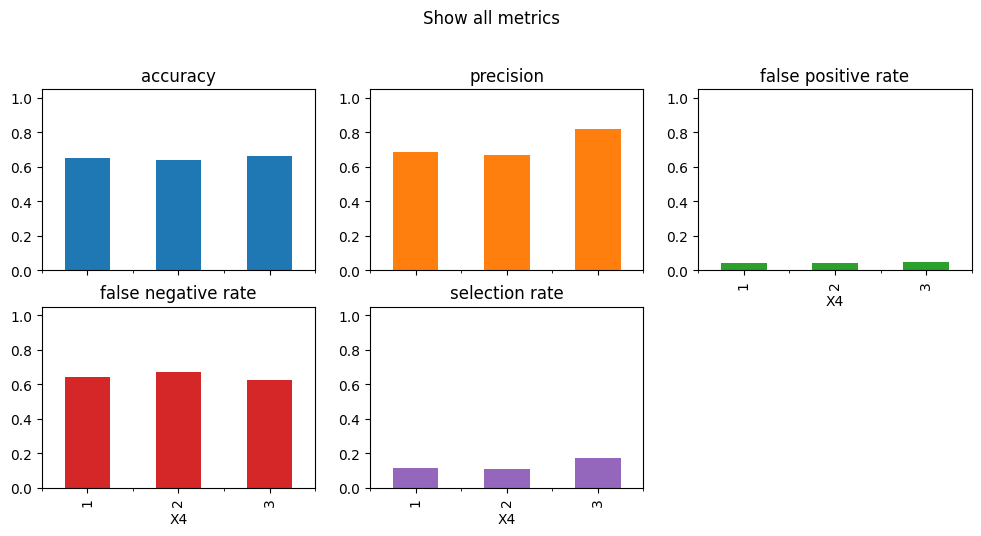

In [15]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [16]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.06363082127123977
Statistical Parity ratio: 0.6297843126036958
Equalized Odds Difference: 0.04501434720229558
Equalized Odds Ratio: 0.8799617407938785
